# Homework 7
Xinyi (Sharon) Wang

In [1]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

### 1. Creating a Graph

Let $V = \{ 1, ..., 20 \}$ and say that $uv \in E$ if and only if $u$ and $v$ have a common factor other than $1$. Use `networkx` to define this graph and render it. Make sure to label the nodes.

C:\Users\sharo\Downloads\zzzz\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


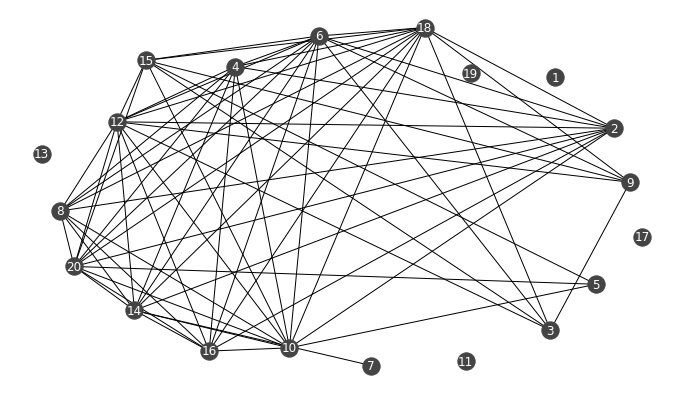

In [2]:
# computes for all numbers from 1 to x the list of factors
def factors(x):
    result = {}
    for i in range(2, x + 1):
        f = set([])
        for j in range(2, i + 1):
            if i % j == 0:
                f.add(j)    
        result[i] = f
    return result

n = 20
G = nx.Graph()
G.add_nodes_from(range(1, n + 1))

all_factors = factors(n)

# pair-wise check for common factors other than 1
for i in range(2, n + 1):
    for j in range(i + 1, n + 1):
        if len(all_factors[j].intersection(all_factors[i])) > 0:
            G.add_edges_from([(i,j)])

# plot graph using fruchterman_reingold_layout
plt.rcParams['figure.figsize'] = [12, 7]
basic_graph,ax = plt.subplots(1,1)
nx.draw(G,
        ax=ax,  
        pos=nx.fruchterman_reingold_layout(G, k = 7),
        with_labels=True, 
        node_color='#444444',
        font_color="white")

### 2. Isomorphism

Draw all graphs with four nodes and four edges, up to isomorphism.

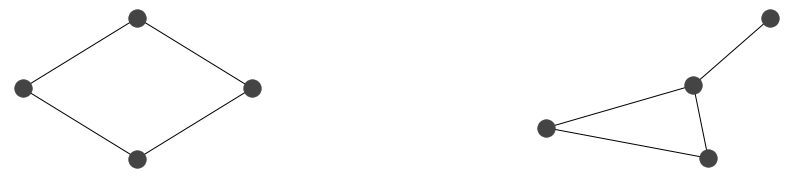

In [3]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4])
G1.add_edges_from([(1,2),(2,3),(3,4),(4,1)])

G2 = nx.Graph()
G2.add_nodes_from([1,2,3,4])
G2.add_edges_from([(1,2),(1,4),(1,3),(3,4)])

graphs,ax = plt.subplots(1,2,figsize=(14,3))
plt.subplots_adjust(wspace=1)
for i,G in enumerate([G1,G2]):
    nx.draw(G, 
            ax=ax[i],
            pos=nx.kamada_kawai_layout(G), 
            node_color='#444444',
            font_color="white")

### 3. Bipartite Graphs

a) What is the greatest number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges up to isomorphism.

b) What is the least number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges up to isomorphism.

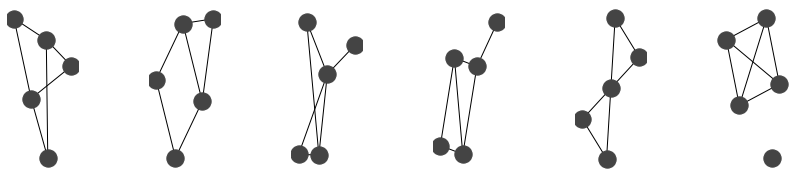

In [4]:
# a) If |U| = 3 and |V| = 2, then the maximum number of edges in the bipartite graph is 3 * 2 = 6
N = [1,2,3,4,5]

G1 = nx.Graph()
G1.add_nodes_from(N)
G1.add_edges_from([(1,2),(2,3),(3,4),(4,1),(2,5),(4,5)])

G2 = nx.Graph()
G2.add_nodes_from(N)
G2.add_edges_from([(1,2),(1,3),(2,3),(2,4),(3,5),(4,5)])

G3 = nx.Graph()
G3.add_nodes_from(N)
G3.add_edges_from([(1,2),(2,4),(4,5),(3,5),(2,3),(2,5)])

G4 = nx.Graph()
G4.add_nodes_from(N)
G4.add_edges_from([(1,2),(2,3),(3,4),(4,5),(2,5),(3,5)])

G5 = nx.Graph()
G5.add_nodes_from(N)
G5.add_edges_from([(1,2),(1,3),(3,4),(4,5),(3,5),(2,3)])

G6 = nx.Graph()
G6.add_nodes_from(N)
G6.add_edges_from([(1,2),(2,4),(3,4),(1,3),(1,4),(2,3)])

G = [G1,G2,G3,G4,G5,G6]

# verify that no two graphs are isomorphic
for i in range(0, len(G)):
    for j in range(i + 1, len(G)):
        if nx.is_isomorphic(G[i], G[j]):
            raise Exception('Not isomorphic')

graphs,ax = plt.subplots(1,6,figsize=(14,3))
plt.subplots_adjust(wspace=1)
for i,crt in enumerate(G):
    nx.draw(crt, 
            ax=ax[i],
            pos=nx.kamada_kawai_layout(crt), 
            node_color='#444444',
            font_color="white")

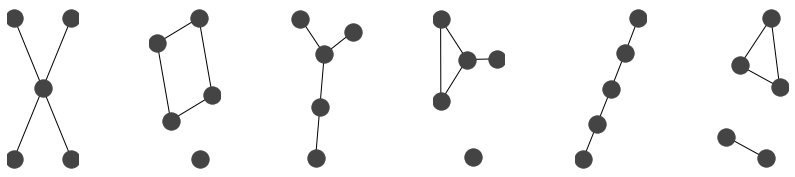

In [5]:
# b) The minimum number of edges in the bipartite graph such that the graph is still
# connected (there exists a path between any two nodes) is 4
N = [1,2,3,4,5]

G1 = nx.Graph()
G1.add_nodes_from(N)
G1.add_edges_from([(1,2),(1,3),(1,4),(1,5)])

G2 = nx.Graph()
G2.add_nodes_from(N)
G2.add_edges_from([(1,2),(2,3),(3,4),(1,4)])

G3 = nx.Graph()
G3.add_nodes_from(N)
G3.add_edges_from([(1,2),(2,3),(2,4),(4,5)])

G4 = nx.Graph()
G4.add_nodes_from(N)
G4.add_edges_from([(1,2),(2,3),(3,4),(2,4)])

G5 = nx.Graph()
G5.add_nodes_from(N)
G5.add_edges_from([(1,2),(2,3),(3,4),(4,5)])

G6 = nx.Graph()
G6.add_nodes_from(N)
G6.add_edges_from([(1,2),(2,3),(1,3),(4,5)])

G = [G1,G2,G3,G4,G5,G6]

# verify that no two graphs are isomorphic
for i in range(0, len(G)):
    for j in range(i + 1, len(G)):
        if nx.is_isomorphic(G[i], G[j]):
            raise Exception('Not isomorphic')

graphs,ax = plt.subplots(1,6,figsize=(14,3))
plt.subplots_adjust(wspace=1)
for i,crt in enumerate(G):
    nx.draw(crt, 
            ax=ax[i],
            pos=nx.kamada_kawai_layout(crt), 
            node_color='#444444',
            font_color="white")

### 4. Cycles

Define and draw a graph that decomposes into three non-overlapping cycles and whose maximal degree is $4$. 

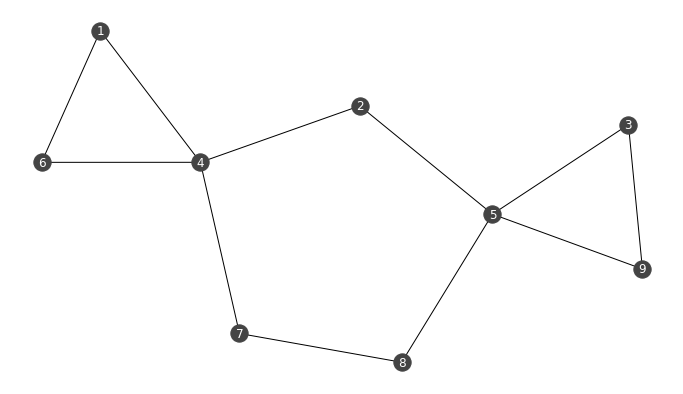

In [6]:
N = [1,2,3,4,5,6,7,8,9]
G = nx.Graph()
G.add_nodes_from(N)
G.add_edges_from([(1,4),(1,6),(6,4),(4,2),(4,7),(7,8),(2,5),(8,5),(5,3),(5,9),(3,9)])

basic_graph,ax = plt.subplots(1,1)
nx.draw(G,
        ax=ax, 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white")

### 5. Hamiltonian Circuits

Consider the set of square grid graphs like those returned by the function `nx.grid_graph(dim=[n,n])` where $n>0$. Show that these graphs always have a Hamilton Circuit when $n$ is even. Use networkx to draw the square grid graph for $n=6$, highlighting a Hamilton cycle. 

C:\Users\sharo\Downloads\zzzz\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


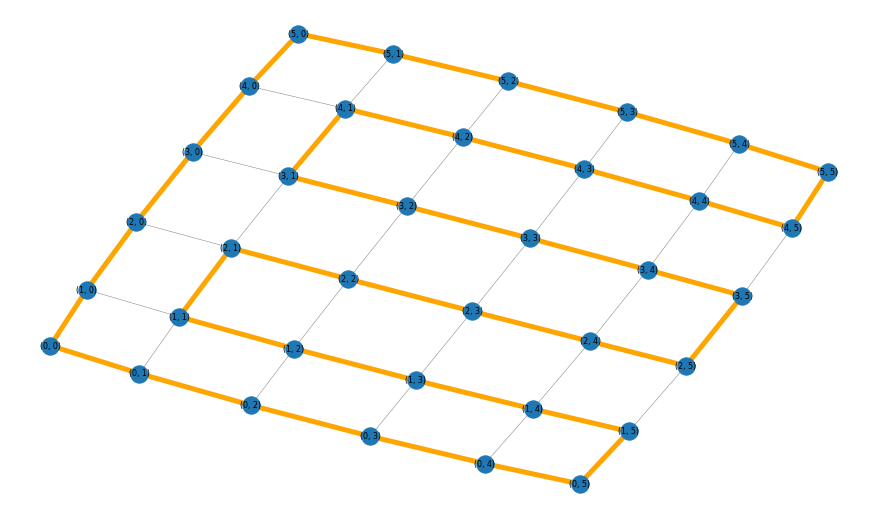

In [7]:
n = 6
F = nx.grid_graph(dim=[n, n])

nodes = list(F.nodes)
start_node = nodes[0]
next_node = nodes[1]
row = 0
column = 1
highlight = [(start_node, next_node)]
move_right = True
while next_node != start_node:
    if column == 0:
        row = row - 1
        # print("Moving up")
    else:
        if move_right:
            if column == (n - 1):
                row = row + 1
                move_right = False
                # print("Moving down")
            else:
                column = column + 1
                # print("Moving right")
        else:
            if column == 1 and row != (n - 1):
                row = row + 1
                move_right = True
                # print("Moving down")
            else:
                column = column - 1
                # print("Moving left")
    
    prev_node = next_node    
    next_node = nodes[row * n + column]
    highlight.append((prev_node, next_node))

edge_colors = ["orange" if (u,v) in highlight or (v, u) in highlight else "gray" for u,v in F.edges]
edge_widths = [5 if (u,v) in highlight or (v, u) in highlight else 0.5 for u,v in F.edges]

pos = nx.spring_layout(F, iterations=300)
nx.draw(F, pos, font_size=8, with_labels = True, edge_color = edge_colors, width = edge_widths)

plt.show()

### 6. Spanning Trees and Hamilton Paths

In the spanning tree algorithm presented in class (and in the Jupyter notebook for this week), the spanning tree algorithm always starts with node zero. Furthermore, it always chooses the first neighbor of $v$ (in the `v.pop()` line). Thus, when the approximate Hamilton Cycle algorithm finds a spanning tree, it always gets the same one. 

Modify the spanning tree function to choose a random starting point and a random neighbor. Then write a wrapper around the code for the approximate Hamilton Cycle algorithm that runs it 10 times and returns the shortest cycle found.

In [8]:
def spanning_tree(G): 
    
    V = {np.random.choice(list(G.nodes))}
    E = set({})
    
    while len(V) < len(G.nodes):

        v = None
        for u in V:
            nbrs = set(G.neighbors(u)) - V
            if len(nbrs) > 0:
                v = np.random.choice(list(nbrs))
                nbrs.remove(v)
                break
                
        if v == None:
            raise Exception("Graph is not connected")

        V.add(v)
        E.add((u,v))
        
    T = nx.Graph()
    T.add_nodes_from(V)
    T.add_edges_from(E)
    
    return T

In [9]:
route = []

def DFS(T):
    global route
    route = []
    for v in T.nodes:
        T.nodes[v]["visited"] = False;
    v = list(T.nodes)[0]
    DFS_aux(T,v)
    return route

def DFS_aux(T,v):
    """Auxilliary method for depth first search"""
    global route
    route.append(v)
    T.nodes[v]["visited"] = True
    children = [u for u in T.neighbors(v) if not T.nodes[u]["visited"]]
    for child in children:
        DFS_aux(T,child)
        route.append(v)

def shorten(G,route):
    """Given a graph G and a route, shorten the route as much
       as possible."""
    new_route = shorten_by_one(G,route)
    while len(new_route) < len(route):
        route = new_route
        new_route = shorten_by_one(G,route)
    return new_route
        
def shorten_by_one(G,route):
    """Given a graph G and a sequence of nodes in route, try to find a 
       repeated node that can be skipped. Return the new route if such a 
       node can be found, or the given route if not."""
    repeats = [v for v in route[1:-1] if route.count(v) > 1]
    random.shuffle(repeats) # avoids always picking 0
    for r in repeats:
        for i,v in enumerate(route):
            if route[i] == r and i != 0 and i != len(route) - 1:
                x,y = route[i-1], route[i+1]
                if G.has_edge(x,y):
                    return route[0:i] + route[i+1:]
    return route

def route_graph(route):
    """Turns a list into a graph"""
    R = nx.Graph()
    R.add_nodes_from(route)
    for i in range(len(route)-1):
        R.add_edge(route[i], route[i+1])
    return R

Found better route of size 35
Found better route of size 34
Found worse route of size 38
Found worse route of size 37
Found better route of size 32
Found worse route of size 34
Found worse route of size 36
Found worse route of size 32
Found worse route of size 33
Found worse route of size 33


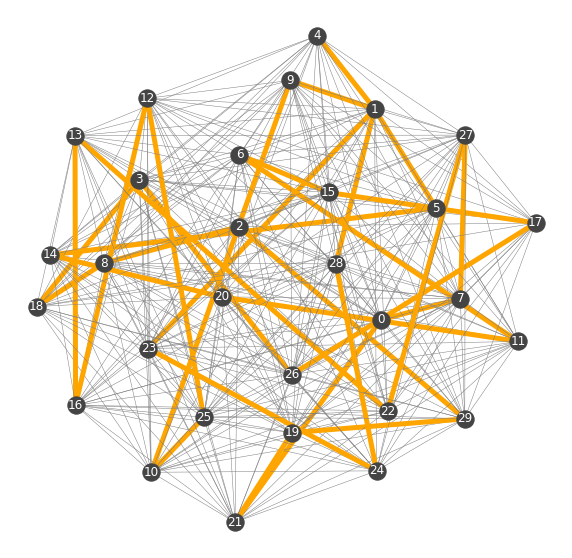

In [10]:
def myWrapper(G):
    shortest = 80 
    myR = G
    for i in range(10):
        T = spanning_tree(G)
        route = shorten(G,DFS(T))

        if len(route) - 1 < shortest:
            shortest = len(route) - 1
            
            print("Found better route of size %d" % shortest)
            myR = route_graph(route)
        else:
            print("Found worse route of size %d" % (len(route) - 1))
    
    return myR

n = 30
G = nx.fast_gnp_random_graph(n,0.75)
R = myWrapper(G)

# Draw the graph with the circuit highlighted
fig,ax = plt.subplots(1,1,figsize=(10,10))
edge_colors = ["orange" if R.has_edge(u,v) else "gray" for u,v in G.edges]
edge_widths = [5 if R.has_edge(u,v) else 0.5 for u,v in G.edges]

nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)

### 7. The Laplacian

Consider the random graphs returned by `nx.fast_gnp_random_graph(n,p)` where $n$ is the number of nodes and $p$ is the probability of an edge between any two nodes. 

Make a list of graphs with $10$ nodes with $p$ ranging from 0 to 1 by steps of 0.01. For each graph, compute the eigenvalues of the Laplacian. Then plot all the eigenvalues for against $p$. For example, above $p=0.01$ you would have a point for each of the 10 real eigenvalues of the graph you made with $p=0.01$. 

What trends do you see in the eigenvalues?

Based on experimentation, what are the eigenvalues of the Laplacian of a completely connected graph?

C:\Users\sharo\Downloads\zzzz\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


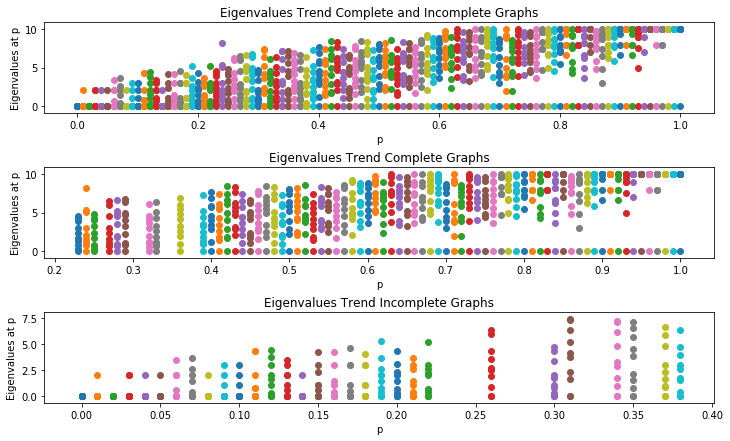

In [11]:
from numpy import linalg as LA

n = 10
Ev = {}
Cev = {}
Ncev = {}
for p in np.linspace(0, 1, 101):
    G = nx.fast_gnp_random_graph(n,p)
    L = nx.laplacian_matrix(G).todense()
    eigenvals = LA.eigvals(L)
    Ev[p] = eigenvals
    
    if nx.number_connected_components(G) == 1: # complete graph
        Cev[p] = eigenvals
    else:
        Ncev[p] = eigenvals

fig, ax = plt.subplots(nrows = 3, ncols = 1)
fig.subplots_adjust(hspace=0.6)

ax[0].set_title("Eigenvalues Trend Complete and Incomplete Graphs")
ax[0].set_xlabel('p')
ax[0].set_ylabel('Eigenvalues at p')

for p in Ev.keys():
    ax[0].scatter([p] * len(Ev[p]), np.sort(Ev[p]), label = p)

ax[1].set_title("Eigenvalues Trend Complete Graphs")
ax[1].set_xlabel('p')
ax[1].set_ylabel('Eigenvalues at p')
    
for p in Cev.keys():
    ax[1].scatter([p] * len(Ev[p]), np.sort(Ev[p]), label = p)

ax[2].set_title("Eigenvalues Trend Incomplete Graphs")
ax[2].set_xlabel('p')
ax[2].set_ylabel('Eigenvalues at p')
    
for p in Ncev.keys():
    ax[2].scatter([p] * len(Ev[p]), np.sort(Ev[p]), label = p)

plt.show() 

As $p$ increases, eigenvalues increase as well. You can clearly see the trend in the graphs above. Also, every $p$ has eigenvalue equals $0$. 

When $p>0.5$, the probability of incomplete graphs is negligible.